In [1]:
import requests

In [2]:
import math
import numpy as np
S0 = 36
T = 1
r = 0.06
sigma = 0.2
def simulate_tree(M) :
    dt = T/M
    u =  math.exp(sigma * math.sqrt(dt))
    d = 1/u
    S = np.zeros((M+1,M+1))
    S[0,0] = 50
    z = 1
    for t in range(1,M+1):
        for i in range(z) :
            S[i,t] = S[i,t-1] * u
            S[i+1,t] = S[i,t-1]*d
        z+=1
    return S
simulate_tree(4)

array([[50.        , 55.2585459 , 61.07013791, 67.49294038, 74.59123488],
       [ 0.        , 45.2418709 , 50.        , 55.2585459 , 61.07013791],
       [ 0.        ,  0.        , 40.93653765, 45.2418709 , 50.        ],
       [ 0.        ,  0.        ,  0.        , 37.04091103, 40.93653765],
       [ 0.        ,  0.        ,  0.        ,  0.        , 33.5160023 ]])

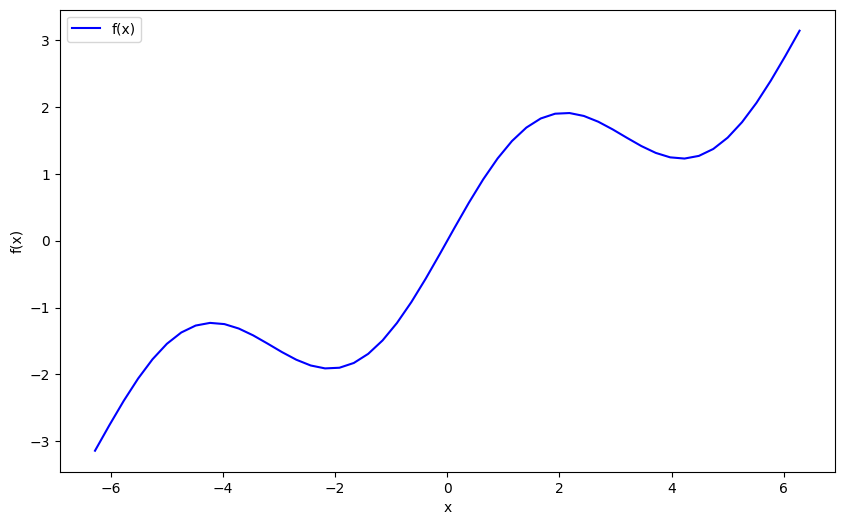

In [3]:
import matplotlib.pyplot as plt
def f(x) : 
    return np.sin(x) + 0.5*x
def create_plot(x,y,styles,labels,axlabels) :
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2*np.pi,2*np.pi,50) 
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])


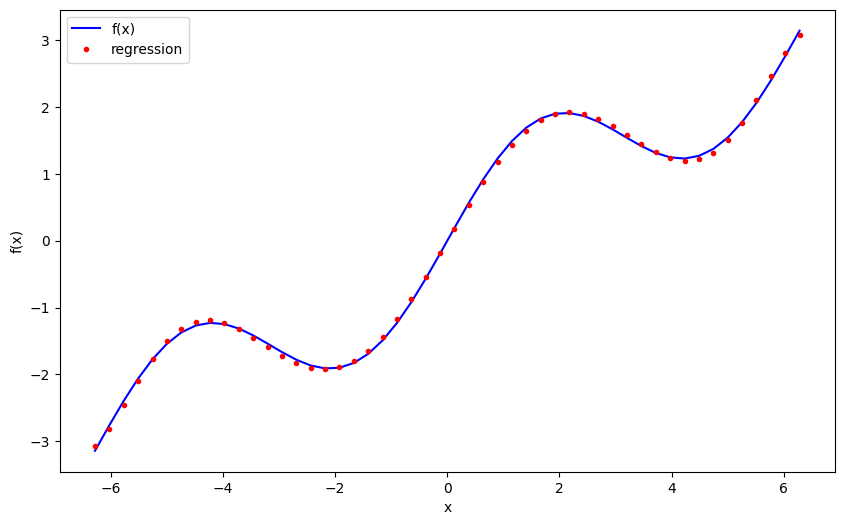

In [4]:
res = np.polyfit(x,f(x),deg = 8,full = True)
ry = np.polyval(res[0], x) 
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'])


In [4]:
matrix = np.zeros((3 + 1, len(x))) 
matrix[3, :] = x ** 3 
matrix[2, :] = x ** 2 
matrix[1, :] = x 
matrix[0, :] = 1
matrix.T

array([[ 1.00000000e+00, -6.28318531e+00,  3.94784176e+01,
        -2.48050213e+02],
       [ 1.00000000e+00, -6.02672876e+00,  3.63214596e+01,
        -2.18899585e+02],
       [ 1.00000000e+00, -5.77027222e+00,  3.32960415e+01,
        -1.92127223e+02],
       [ 1.00000000e+00, -5.51381568e+00,  3.04021633e+01,
        -1.67631925e+02],
       [ 1.00000000e+00, -5.25735913e+00,  2.76398251e+01,
        -1.45312487e+02],
       [ 1.00000000e+00, -5.00090259e+00,  2.50090267e+01,
        -1.25067707e+02],
       [ 1.00000000e+00, -4.74444605e+00,  2.25097683e+01,
        -1.06796381e+02],
       [ 1.00000000e+00, -4.48798951e+00,  2.01420498e+01,
        -9.03973081e+01],
       [ 1.00000000e+00, -4.23153296e+00,  1.79058712e+01,
        -7.57692842e+01],
       [ 1.00000000e+00, -3.97507642e+00,  1.58012325e+01,
        -6.28111068e+01],
       [ 1.00000000e+00, -3.71861988e+00,  1.38281338e+01,
        -5.14215731e+01],
       [ 1.00000000e+00, -3.46216333e+00,  1.19865749e+01,
      

Text(0.5, 1.0, 'Poisson')

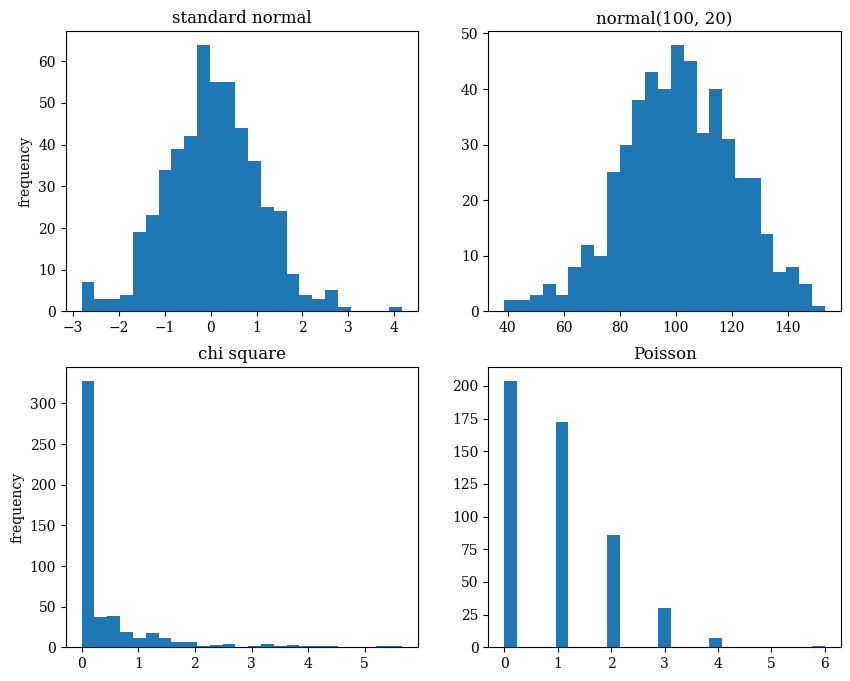

In [5]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt,mpl
# plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100,20,sample_size)
rn3 = npr.chisquare(df = 0.5,size = sample_size)
rn4 = npr.poisson(lam = 1.0,size = sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

[[36. 36. 36. ... 36. 36. 36.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[36.         36.         36.         ... 36.         36.
  36.        ]
 [35.36197751 35.08312308 36.73944525 ... 34.77594273 35.82724194
  34.48913811]
 [33.59424236 34.74971848 36.56507905 ... 35.19756831 33.9985753
  35.50778989]
 ...
 [44.70067196 26.29965182 36.53335692 ... 49.70267658 34.17415198
  36.68584282]
 [43.61107215 25.70182799 36.15196689 ... 48.51788442 33.77633396
  36.94471408]
 [43.82810149 25.12428883 38.09254315 ... 49.18342967 33.89787077
  36.53831817]]


Text(0, 0.5, 'frequency')

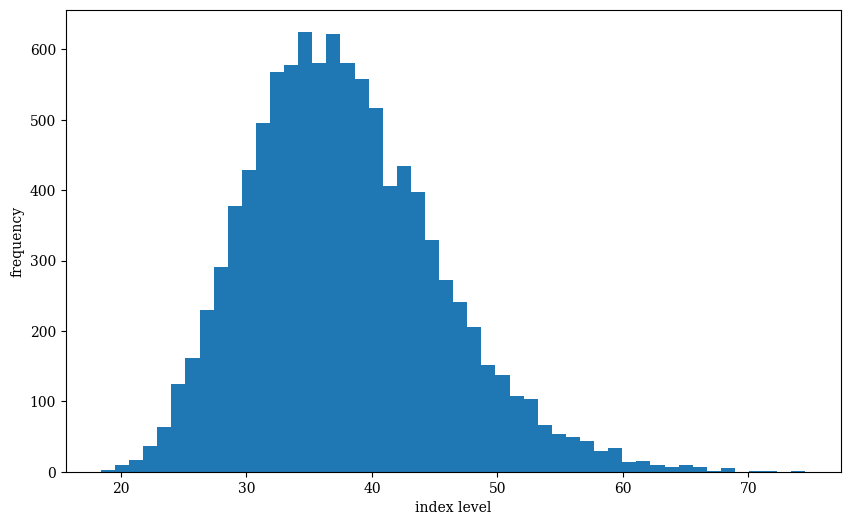

In [8]:
# Black_Scholes model to caculate the future price
I = 10000 
M = 50 
dt = T / M 
r = 0.05
T = 2.0
S = np.zeros((M + 1, I)) 
S[0] = S0 
print(S)
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
        sigma * math.sqrt(dt) * npr.standard_normal(I))
print(S)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

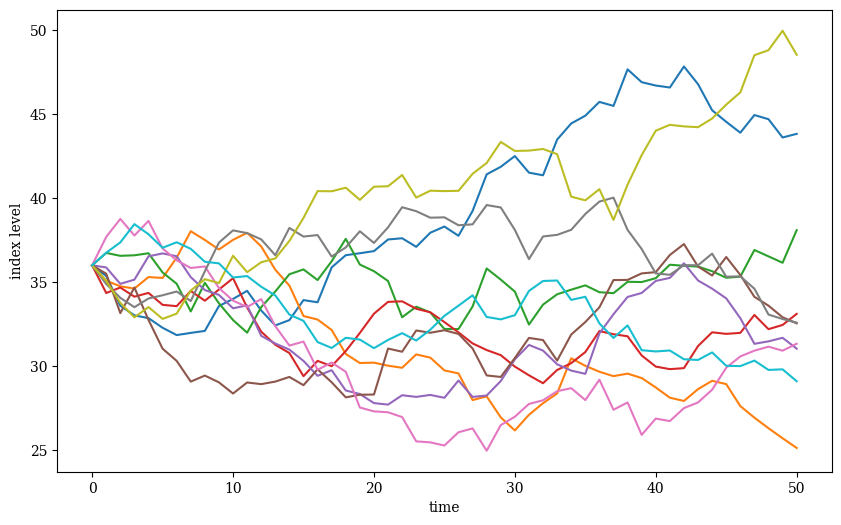

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

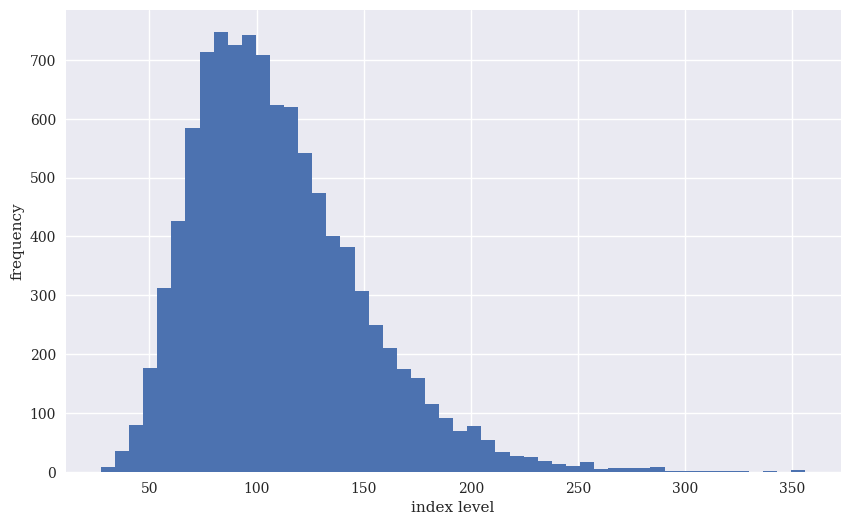

In [36]:
# One base sample of Black-Scholes
S0 = 100 
r = 0.05 
sigma = 0.25 
T = 2.0 
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I)) 
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

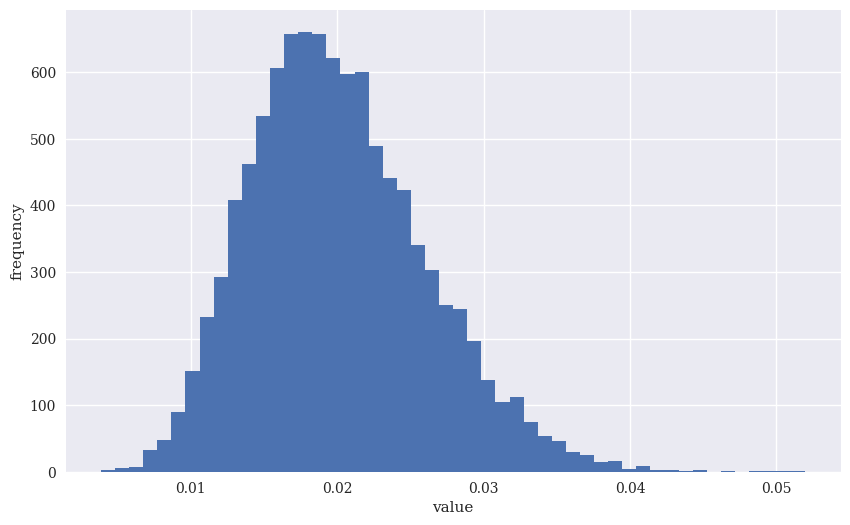

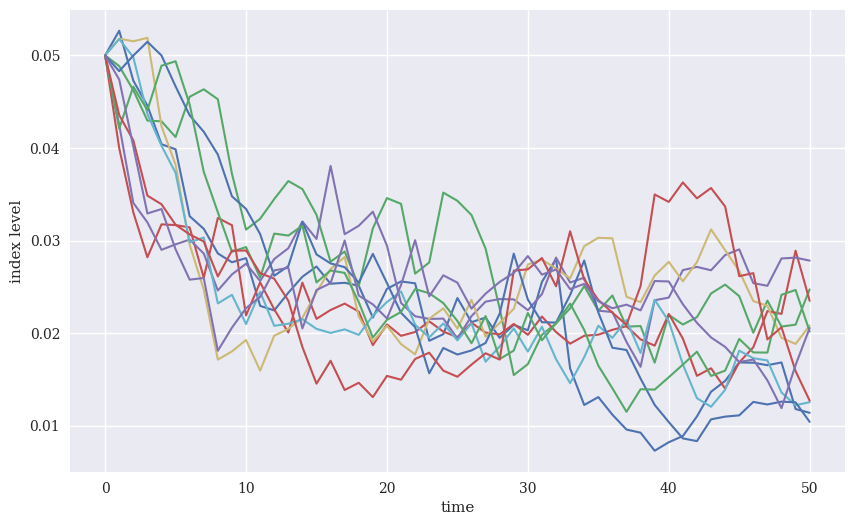

In [44]:
# ---------------------Stochastic volatility----------------------------

# 1. Giá trị trung bình hồi phục (θ)
# Giá trị trung bình hồi phục θ là mức độ mà biến động giá (volatility) có xu hướng quay về theo thời gian. 
# Nó đại diện cho giá trị ổn định mà biến động giá sẽ hướng tới trong dài hạn.

# Vai trò: Khi biến động giá hiện tại quá cao hoặc quá thấp so với θ, mô hình Heston sẽ đưa biến động giá trở về giá trị θ theo thời gian.
# Đơn giản: θ có thể được hiểu là mức trung bình của biến động giá mà biến động giá sẽ cố gắng đạt được.
# Ví dụ cụ thể:
# Giả sử giá trị trung bình hồi phục θ là 0.25. Điều này có nghĩa là trong dài hạn, biến động giá sẽ có xu hướng trở về giá trị 0.25.
# Nếu biến động hiện tại là 0.3, mô hình sẽ có xu hướng giảm biến động xuống gần 0.25. 
# Ngược lại, nếu biến động hiện tại là 0.2, mô hình sẽ có xu hướng tăng biến động lên gần 0.25.


# 2. Tỷ lệ hồi phục (κ)
# Tỷ lệ hồi phục κ là một tham số điều chỉnh tốc độ mà biến động giá quay trở về giá trị trung bình hồi phục 
# θ. Nó xác định mức độ "sát sao" của mô hình với giá trị trung bình hồi phục.

# Vai trò: 
    # κ cho biết tốc độ mà biến động giá điều chỉnh để trở về 
    # θ. Tỷ lệ hồi phục cao có nghĩa là biến động giá sẽ trở về 
    # θ nhanh hơn.
# Đơn giản: 
    # κ xác định tốc độ phản ứng của biến động giá đối với sự khác biệt giữa giá trị hiện tại và giá trị trung bình hồi phục.
    # Ví dụ cụ thể:
    # Nếu κ là 3.0 và θ là 0.25:
    # Nếu biến động hiện tại là 0.1, mô hình sẽ điều chỉnh biến động để tăng lên gần 0.25 với tốc độ do κ xác định.
    # Nếu κ là cao (ví dụ, 10), biến động giá sẽ trở về 0.25 nhanh chóng.
    # Nếu κ là thấp (ví dụ, 0.5), biến động giá sẽ trở về 0.25 chậm hơn.

# Using euler discretization for square-root diffusion
# x0: Giá trị ban đầu của quá trình khuếch tán (0.05).
# kappa: Tốc độ trở về mức trung bình (3.0).
# theta: Mức trung bình dài hạn hay giá trị trung bình hồi phục  (0.02).
# sigma: Độ biến động (0.1).
# I: Số lượng mô phỏng (10000).
# M: Số bước thời gian (50).
# dt: Kích thước bước thời gian (dt = T/M).
# So với hình trên, hình này có phân bối chủ yếu taij 0.2, mặc dù có giá trị khởi tạo là 0.5, điều này có nghĩa là 
# các số không đối xứng nhau qua giá trị khởi tạo như hình trên, liệu có phải do x1 tuân theo phân bố chi-square
# và ý nghĩa của phân rã eulẻr là tạo ra phân bố chi-square ????

x0 = 0.05 
kappa = 3.0 
theta = 0.02 
sigma = 0.1 
I = 10000
T = 2.0
M = 50
dt = T / M
# Sưr dụng euler để tính squre-root diffúion
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
    sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
    math.sqrt(dt) * npr.standard_normal(I)) 
    x = np.maximum(xh, 0)
    return x
# Sử dụng noncentral_chisquare để tính chính xác
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2 
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa) 
        nc = np.exp(-kappa * dt) / c * x[t - 1] 
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I) 
    return x
x2 = srd_exact()

x1 = srd_euler()
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [12]:
# Mô hình Heston là một mô hình phổ biến trong tài chính để mô phỏng giá cổ phiếu với biến động ngẫu nhiên.
#  Nó mở rộng mô hình Black-Scholes bằng cách cho phép độ biến động thay đổi theo thời gian, thay vì giữ cố định. 
# Điều này giúp mô hình Heston phù hợp hơn với thực tế, vì độ biến động của giá cổ phiếu thường không cố định trong suốt thời gian.

# Một trong những giả định đơn giản hóa chính của mô hình Black-Scholes-Merton là độ biến động không đổi. Tuy nhiên, độ biến động nói chung không phải là hằng số cũng không phải là xác định—mà là ngẫu nhiên. Do đó, một tiến bộ lớn liên quan đến mô hình tài chính đã đạt được vào đầu những năm 1990 với sự ra đời của cái gọi là mô hình độ biến động ngẫu nhiên
# . Một trong những mô hình phổ biến nhất thuộc loại đó là mô hình của Heston
# Phương trinhf vi phân ngẫu nhiên cho biến động Heston

# Phương trình Heston gồm 2 phương trình vi phân ngẫu nhiên 
# 1,Phương trình cho giá cổ phiếu St :
#     dSt = u*Stdt + sqrt(vt)*St*dWs
# trong đó :
#     St là giá tại thời điểm t
#     u là tỉ lệ tăng trưởng kỳ vọng
#     vt là độ biến động tại thời điểm t
#     Ws là một quá trinh weiner cho biến động giá cô phiếu 
# 2, Phương trình cho biến động vt :
#     dvt = k(o - vt)dt + phi*sqrt(vt)dWv
# trong đó :
#     vt là biến động tại thời điêm t
#     k là độ phục hồi về giá trung bình o
#     o là trung bình của biến động
#     phi là độ biến động của biến động
#     Wv là một quá trinhf weiner cho biêns động giá

# Cả Wv và Ws đều có độ tương quan là p

# Ma trận tương quan là một ma trận vuông biểu diễn mối tương quan giữa các cặp biến ngẫu nhiên. Các giá trị trong ma trận 
# tương quan nằm trong khoảng từ -1 đến 1, với các giá trị cụ thể như sau:

# Giá trị 1 biểu thị mối tương quan dương hoàn hảo.
# Giá trị -1 biểu thị mối tương quan âm hoàn hảo.
# Giá trị 0 biểu thị không có mối tương quan.
# Ma trận tương quan thường được sử dụng để mô tả mối tương quan giữa các biến ngẫu nhiên trong một tập dữ liệu. 
# Trong bối cảnh mô hình Heston, nó mô tả mối tương quan giữa giá cổ phiếu và biến động giá.

# Khởi tạo các tham số của mô hình Heston:

# S0 = 100.0: Giá cổ phiếu ban đầu.
# r = 0.05: Lãi suất phi rủi ro.
# v0 = 0.1: Biến động giá cổ phiếu ban đầu.
# kappa = 3.0: Tốc độ hồi phục của biến động giá về giá trị trung bình.
# theta = 0.25: Giá trị trung bình của biến động giá khi nó hồi phục.
# sigma = 0.1: Độ biến động của biến động giá.
# rho = 0.6: Hệ số tương quan giữa giá cổ phiếu và biến động giá.
# T = 1.0: Thời gian đáo hạn.
# Xây dựng ma trận tương quan:

# corr_mat = np.zeros((2, 2)): Tạo một ma trận 2x2 chứa toàn số 0.
# corr_mat[0, :] = [1.0, rho]: Thiết lập hàng đầu tiên của ma trận tương quan.
# corr_mat[1, :] = [rho, 1.0]: Thiết lập hàng thứ hai của ma trận tương quan.
# Ma trận tương quan này biểu diễn mối tương quan giữa giá cổ phiếu và biến động giá.

# Tính ma trận Cholesky:

# cho_mat = np.linalg.cholesky(corr_mat): Tính toán ma trận Cholesky của ma trận tương quan.
# Ma trận Cholesky sẽ được sử dụng để tạo ra các biến ngẫu nhiên tương quan từ các biến ngẫu nhiên độc lập. Điều này hữu ích trong việc mô phỏng đường giá của cổ phiếu và biến động giá theo thời gian.

# In ra ma trận Cholesky:

# cho_mat: Kết quả của ma trận Cholesky được tính toán.
S0 = 100.
r = 0.05
v0 = 0.1 
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6 
T = 1.0
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 
cho_mat 

# Ý nghĩa của ma trận tương quan và phép phân tích ma trận Cholesky :
# 1. Biến ngẫu nhiên độc lập
#  Biến ngẫu nhiên độc lập là các biến không có mối tương quan với nhau. Ví dụ, nếu Z1 và Z2 là hai biên ngẫu nhiên độc lập
# thì Z1 không lq đến Z2 
# 2,Ma trận tương quan 
# Ma trận tương quan biểu diễn mối tương quan giữa các cặp biến ngẫu nhiên. Nếu chúng ta có hai biến ngẫu nhiên W1 và W2
#   với hệ số tương quan 𝜌 thì ma trận tương quan của chúng sẽ là:
#     Σ = [[1,p]
#              [p,1]]
# 3,Phép phân tích Cholesky :
# Phép phân tích Cholesky là một phương pháp phân tích ma trận, trong đó một ma trận đối xứng dương (như ma trận tương quan) được phân tích thành 
# tích của một ma trận tam giác dưới và ma trận chuyển vị của nó. Cụ thể, cho ma trận tương quan 
# Σ, phép phân tích Cholesky tìm ma trận tam giác dưới L sao cho:
#     Σ = L*LT 
# Trong đó LT là ma trận chuyển vị của L
# 4. Tạo các biến ngẫu nhiên tương quan
# Khi chúng ta có các biến ngẫu nhiên độc lập, chúng ta có thể sử dụng ma trận Cholesky để tạo ra các biến ngẫu nhiên có mối tương quan mong muốn. Đây là cách làm:

# Tạo các biến ngẫu nhiên độc lập: Giả sử Z1 và Z2 là hai biến ngẫu nhiên độc lập với nhau.
# Nhân với ma trận Cholesky: Sử dụng ma trận tam giác dưới L từ phép phân tích Cholesky để tạo các biến ngẫu nhiên tương quan W1 và W2
# : [W1,W2] = L*[Z1,Z2]


array([[1. , 0. ],
       [0.6, 0.8]])

In [29]:
# Trước khi bắt đầu mô phỏng các quá trình ngẫu nhiên, toàn bộ tập hợp các số ngẫu nhiên cho cả hai quá trình được tạo ra, 
# tìm cách sử dụng tập 0 cho quá trình chỉ số và tập 1 cho quá trình biến động. Đối với quá trình biến động được mô hình hóa bằng khuếch tán căn bậc hai, 
# lược đồ Euler được chọn, có tính đến tương quan thông qua
# Ma trận Cholesky:

M = 50      # Số bước thời gian trong mô phỏng
I = 10000   # Số lượng đường mô phỏng
dt = T / M  # Khoảng thời gian giữa các bước
ran_num = npr.standard_normal((2, M + 1, I)) 
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :]) # Nhân ma trận Cholesky với các biến ngẫu nhiên để tạo ra các biến ngẫu nhiên tương quan
#     Cập nhật biến động (vh[t]):

# Tại bước thời gian t, biến động mới vh[t] được tính bằng cách cộng giá trị biến động tại bước thời gian trước đó (vh[t - 1]) với hai thành phần:
# Thành phần hồi phục: 
#   Đưa biến động về giá trị trung bình theta theo tỷ lệ hồi phục kappa, điều này được thực hiện bằng cách nhân hiệu giữa giá trị trung bình theta 
# và giá trị biến động hiện tại vh[t - 1], sau đó nhân với bước thời gian dt.

# Thành phần ngẫu nhiên: 
# Cung cấp sự thay đổi ngẫu nhiên trong biến động, tính bằng cách nhân sigma, độ biến động hiện tại, và biến ngẫu nhiên ran[1] với phần điều chỉnh theo bước thời gian.
# Đảm bảo không âm (np.maximum(vh[t - 1], 0)):

# Hàm np.maximum đảm bảo rằng biến động không trở thành âm, vì biến động không thể âm trong mô hình Heston.
    vh[t] = (vh[t - 1] +
            kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
            sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
            math.sqrt(dt) * ran[1]) 
v = np.maximum(vh, 0)
v
# Tóm lại, hàm này để mô phỏng độ biến động giá theo mô hình Heston

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.11536419, 0.11621647, 0.10059682, ..., 0.11609063, 0.10610937,
        0.11209343],
       [0.11937027, 0.12661236, 0.10920802, ..., 0.12887457, 0.11511914,
        0.13022926],
       ...,
       [0.22826429, 0.19755358, 0.22708456, ..., 0.24466646, 0.23275404,
        0.25658243],
       [0.22608365, 0.20846394, 0.22748196, ..., 0.25251171, 0.23393714,
        0.24271056],
       [0.22639581, 0.21582082, 0.23487587, ..., 0.25813792, 0.24218818,
        0.23869098]])

In [30]:
# Đoạn mã mô phỏng giá cổ phiếu theo mô hình Heston.
# Nó sử dụng giá cổ phiếu và biến động giá tại bước thời gian trước đó để tính toán giá cổ phiếu tại bước thời gian hiện tại.
# Công thức tính toán giá cổ phiếu bao gồm một phần không ngẫu nhiên và một phần ngẫu nhiên, với phần ngẫu nhiên dựa trên độ biến động của giá cổ phiếu.
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
            np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

Text(0.5, 0, 'volatility')

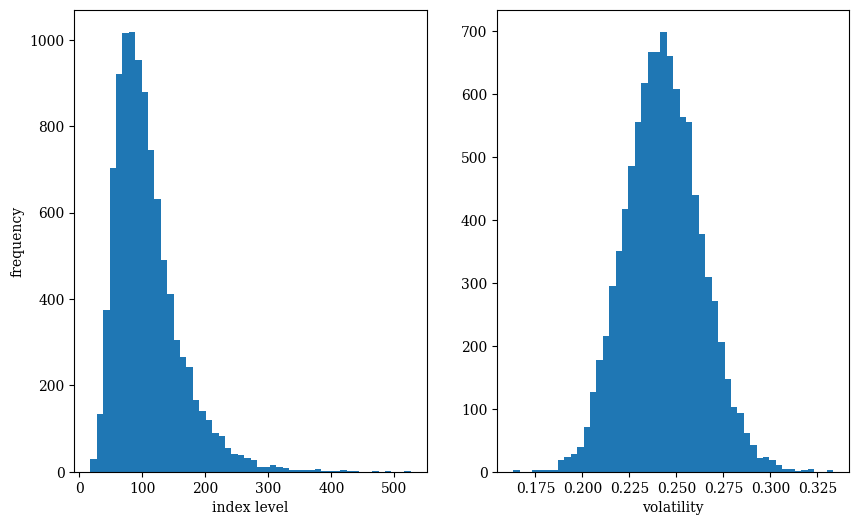

In [31]:
# Mô hình giá và độ biến động
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')

Text(0, 0.5, 'volatility')

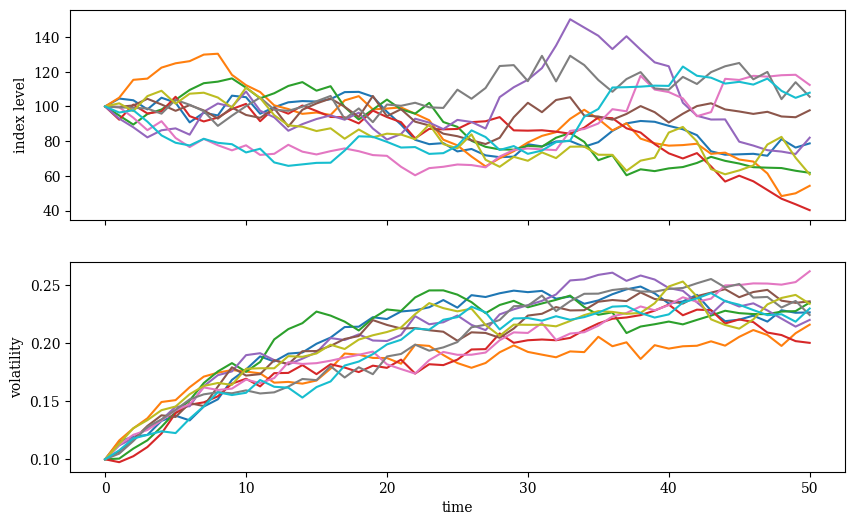

In [32]:
# Mô phỏng sự biến động :
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')

Text(0, 0.5, 'frequency')

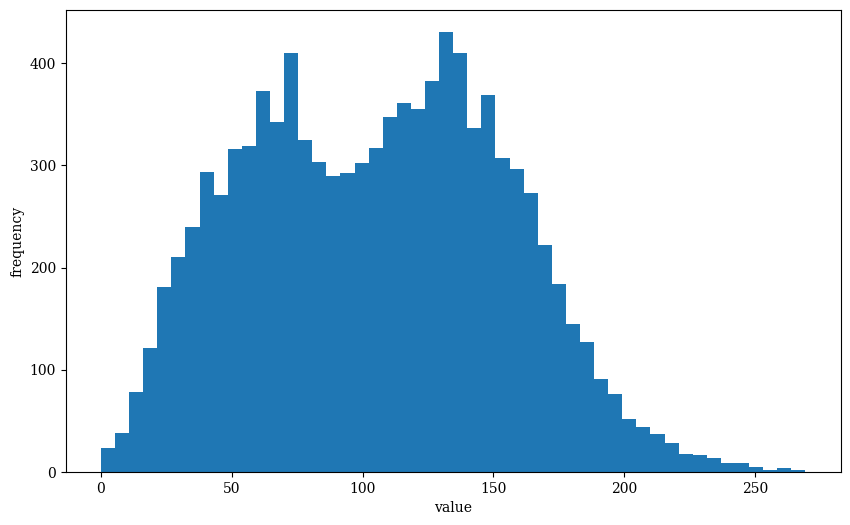

In [6]:
# --------------------Jump diffusion---------------
# Mô hình Jump Diffusion của Merton là một mô hình tài chính mở rộng mô hình Brownian Motion để bao gồm cả nhảy (jumps) trong quá trình giá.
# Mô hình này kết hợp các yếu tố của mô hình biến động liên tục với các nhảy bất ngờ để mô phỏng sự thay đổi giá cổ phiếu một cách thực tế hơn.

# Các thành phần chính của mô hình Merton Jump Diffusion
# 1,Chuyển động Brownian (Diffusion Process):
#     -Mô hình Merton dựa trên mô hình biến động liên tục (Brownian motion) của cổ phiếu.
#     -Giá cổ phiếu St được mô phỏng bằng cách sử dụng phương trình sau:
#         dSt = u*St*dt + phi*St*dWt
#     Trong đó :
#     -u là lãi suất kì vọng 
#     -phi là độ biến động của cổ phiếu
#     -dWt là phần ngẫu nhiên của biến động,theo phân phối chuẩn

# 2,Nhảy (Jump Process):
#     Mô hình Merton bổ sung một phần nhảy (jump) để mô phỏng các sự kiện bất ngờ (như tin tức hay thông tin quan trọng) mà có thể ảnh hưởng đến giá cổ phiếu.
#     Các nhảy này được mô phỏng bằng cách sử dụng một quá trình Poisson, với phần nhảy có phân phối lognormal.
#     Phương trình của quá trình nhảy được cho bởi:
#         dSt = St*(u*dt+phi*dWt + JdNt)
#     Trong đó:
#     J là kích thước của nhảy, theo phân phối lognormal.
#     Nt là quá trình Poisson, mô phỏng số lần nhảy xảy ra trong khoảng thời gian dt.


# Cách hoạt động của mô hình
    # Chuyển động Brownian (Diffusion Component):
        # Mô hình này mô phỏng biến động giá cổ phiếu liên tục như trong mô hình Black-Scholes, với độ biến động và lãi suất không rủi ro.
    # Nhảy (Jump Component):
        # Thêm vào phần nhảy để mô phỏng các sự kiện bất ngờ. Số lượng nhảy trong một khoảng thời gian tuân theo phân phối Poisson.
        # Kích thước của các nhảy tuân theo phân phối lognormal.

S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75 
mu = -0.6 
delta = 0.25 
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) 
T = 1.0
M = 50
I = 10000
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) 
sn2 = npr.standard_normal((M + 1, I)) 
poi = npr.poisson(lamb * dt, (M + 1, I)) 
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                        sigma * math.sqrt(dt) * sn1[t]) +
                        (np.exp(mu + delta * sn2[t]) - 1) *
                        poi[t]) 
    S[t] = np.maximum(S[t], 0)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

In [7]:
# ---------------Giảm phương sai--------------
# Các hàm tạo số ngẫu nhiên của Python tạo ra các số ngẫu nhiên giả, và do kích thước mẫu có thể thay đổi,
#  các thống kê của các bộ số ngẫu nhiên này có thể không khớp với các giá trị kỳ vọng. Để kiểm tra điều này,
#  ta cần tạo ra các bộ số ngẫu nhiên và kiểm tra xem giá trị trung bình và độ lệch chuẩn của chúng có khớp với kỳ vọng hay không.
#  Để làm cho việc kiểm tra này có ý nghĩa, giá trị seed của bộ tạo số ngẫu nhiên được cố định, giúp đảm bảo kết quả có thể tái lập.
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))



           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [8]:
# Mặc dù tăng kích thước mẫu có thể cải thiện độ chính xác của các thống kê của số ngẫu nhiên, nhưng các thống kê vẫn 
# không hoàn toàn khớp với giá trị mong muốn. Để khắc phục điều này, ta có thể sử dụng kỹ thuật antithetic variates, 
# trong đó rút ra một nửa số lượng mẫu ngẫu nhiên mong muốn và sau đó thêm vào các số ngẫu nhiên với dấu ngược lại. 
# Kỹ thuật này đảm bảo rằng giá trị trung bình của tập hợp số ngẫu nhiên là 0. 
# Trong Python, kỹ thuật này có thể dễ dàng triển khai bằng cách sử dụng NumPy và hàm np.concatenate()
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))




           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
-0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [9]:
# Moment Matching :
# Phương pháp: Điều chỉnh tập dữ liệu sao cho giá trị trung bình và độ lệch chuẩn khớp với giá trị mong muốn. 
# Điều này thường được thực hiện bằng cách thay đổi các số ngẫu nhiên để phù hợp với phân phối chuẩn.

sn = npr.standard_normal(10000)
sn.mean()
sn.std()
sn_new = (sn - sn.mean()) / sn.std() 
sn_new.mean()
sn_new.std()

# Antithetic Variates chỉ điều chỉnh moment đầu tiên (giá trị trung bình) nhưng không điều chỉnh moment thứ hai (độ lệch chuẩn).
# Moment Matching là kỹ thuật giúp điều chỉnh cả moment đầu tiên và thứ hai, đảm bảo cả giá trị trung bình và độ lệch chuẩn khớp với giá trị mong muốn.
# Kỹ thuật này cải thiện độ chính xác của các thống kê của tập dữ liệu ngẫu nhiên, giúp chúng khớp hơn với các giá trị kỳ vọng của phân phối chuẩn chuẩn hóa.

np.float64(0.9999999999999999)